<div style="background: linear-gradient(to right, #11998e, #38ef7d); padding: 30px; border-radius: 15px; box-shadow: 0 4px 8px 0 rgba(0,0,0,0.2);">
    <h1 style="color: white; font-family: 'Verdana'; text-align: center; text-shadow: 2px 2px 4px #000000;">⚡ Lighting the Future: Global School Electricity Access</h1>
    <h3 style="color: #f1f2f6; text-align: center;">A Time-Series Analysis of Educational Infrastructure (2000-2020)</h3>
    <hr style="border: 1px solid white; width: 60%;">
    <p style="color: white; text-align: center; font-size: 1.1em;">
        <b>🎯 Objective:</b> Identify the "Energy Gap" in education and cluster countries by their development trajectory.<br>
        <b>🛠 Techniques:</b> Spatiotemporal Mapping, K-Means Clustering, & Animated Visuals.
    </p>
</div>

<br>

<div style="display: flex; justify-content: space-around;">
    <div style="background-color: #e3f2fd;color:black; padding: 15px; border-radius: 10px; width: 30%; border-left: 5px solid #2196F3;">
        <h4>📊 1. The Global Map</h4>
        <p>Animated geo-spatial analysis of power access.</p>
    </div>
    <div style="background-color: #e8f5e9;color:black; padding: 15px; border-radius: 10px; width: 30%; border-left: 5px solid #4CAF50;">
        <h4>📉 2. The Gap Analysis</h4>
        <p>Identifying the most underserved nations.</p>
    </div>
    <div style="background-color: #fff3e0;color:black; padding: 15px; border-radius: 10px; width: 30%; border-left: 5px solid #FF9800;">
        <h4>🤖 3. ML Clustering</h4>
        <p>Grouping countries by growth patterns.</p>
    </div>
</div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-school-electricity-access/school_electricity_access.csv


<div style="background: linear-gradient(to right, #11998e, #38ef7d); padding: 30px; border-radius: 15px; box-shadow: 0 4px 8px 0 rgba(0,0,0,0.2);">
    <h1 style="color: white; font-family: 'Verdana'; text-align: center; text-shadow: 2px 2px 4px #000000;">Imports Required Libraries</h1>
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings


plt.rcParams['figure.dpi'] = 150
sns.set_theme(style="white")
# Custom Palette: Dark Green, Light Green, Teal, Earthy Brown
custom_colors = ["#2d6a4f", "#40916c", "#52b788", "#74c69d", "#d8f3dc"]
sns.set_palette(custom_colors)
warnings.filterwarnings('ignore')

print("✅ Environment Ready: Sustainability Analytics Mode On")

✅ Environment Ready: Sustainability Analytics Mode On


<div style="background: linear-gradient(to right, #11998e, #38ef7d); padding: 30px; border-radius: 15px; box-shadow: 0 4px 8px 0 rgba(0,0,0,0.2);">
    <h1 style="color: white; font-family: 'Verdana'; text-align: center; text-shadow: 2px 2px 4px #000000;">Load Dataset</h1>
</div>

In [3]:
df = pd.read_csv('/kaggle/input/global-school-electricity-access/school_electricity_access.csv')
df.shape

(675, 4)

<div style="background: linear-gradient(to right, #11998e, #38ef7d); padding: 30px; border-radius: 15px; box-shadow: 0 4px 8px 0 rgba(0,0,0,0.2);">
    <h1 style="color: white; font-family: 'Verdana'; text-align: center; text-shadow: 2px 2px 4px #000000;">EDA</h1>
</div>

In [4]:
df.head()

,Country_Name,ISO_Code,Year,Electricity_Access_Percent
0,Albania,ALB,2018,94.085213
1,Albania,ALB,2019,97.713760
2,Andorra,AND,2016,100.000000
3,Andorra,AND,2017,100.000000
4,Andorra,AND,2018,100.000000


In [5]:
df.tail()

,Country_Name,ISO_Code,Year,Electricity_Access_Percent
670,West Bank and Gaza,PSE,2017,100.000000
671,West Bank and Gaza,PSE,2018,100.000000
672,West Bank and Gaza,PSE,2019,100.000000
673,Zambia,ZMB,2016,32.369942
674,Zambia,ZMB,2017,36.401669


In [6]:
df.isnull().sum()

Country_Name                  0
ISO_Code                      0
Year                          0
Electricity_Access_Percent    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country_Name                675 non-null    object 
 1   ISO_Code                    675 non-null    object 
 2   Year                        675 non-null    int64  
 3   Electricity_Access_Percent  675 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 21.2+ KB


In [9]:
df.describe()

,Year,Electricity_Access_Percent
count,675.000000,675.000000
mean,2012.837037,88.199861
std,5.488060,26.340861
min,2000.000000,2.896940
25%,2009.000000,98.235050
50%,2015.000000,100.000000
75%,2017.000000,100.000000
max,2020.000000,100.000000


In [10]:
# 1. Get the latest available year for EACH country
idx = df.groupby('Country_Name')['Year'].idxmax()
df_latest = df.loc[idx].reset_index(drop=True)

# 2. Calculate the "Energy Gap" (100% - Access)
df_latest['Energy_Gap'] = 100 - df_latest['Electricity_Access_Percent']

# 3. Create Categories for Visualization
def categorize_access(x):
    if x == 100: return 'Fully Powered'
    elif x > 75: return 'High Access'
    elif x > 50: return 'Moderate Access'
    else: return 'Critical Shortage'

df_latest['Status'] = df_latest['Electricity_Access_Percent'].apply(categorize_access)

print(f"📊 Dataset Status: Covered {df['Country_Name'].nunique()} Countries across {df['Year'].nunique()} Years.")
df_latest.head()

📊 Dataset Status: Covered 143 Countries across 21 Years.


,Country_Name,ISO_Code,Year,Electricity_Access_Percent,Energy_Gap,Status
0,Albania,ALB,2019,97.713760,2.286240,High Access
1,Andorra,AND,2019,100.000000,0.000000,Fully Powered
2,Angola,AGO,2016,22.350550,77.649450,Critical Shortage
3,Antigua and Barbuda,ATG,2018,100.000000,0.000000,Fully Powered
4,Argentina,ARG,2017,96.843338,3.156662,High Access


<div style="background: linear-gradient(to right, #11998e, #38ef7d); padding: 30px; border-radius: 15px; box-shadow: 0 4px 8px 0 rgba(0,0,0,0.2);">
    <h1 style="color: white; font-family: 'Verdana'; text-align: center; text-shadow: 2px 2px 4px #000000;">Data Visualization</h1>
</div>

In [11]:
fig = px.choropleth(
    df.sort_values('Year'),
    locations="ISO_Code",
    color="Electricity_Access_Percent",
    hover_name="Country_Name",
    animation_frame="Year",
    color_continuous_scale="Greens",
    range_color=[0, 100],
    title="The Spread of School Electricity (2000-2020)"
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'),
    margin={"r":0,"t":50,"l":0,"b":0}
)
fig.show()

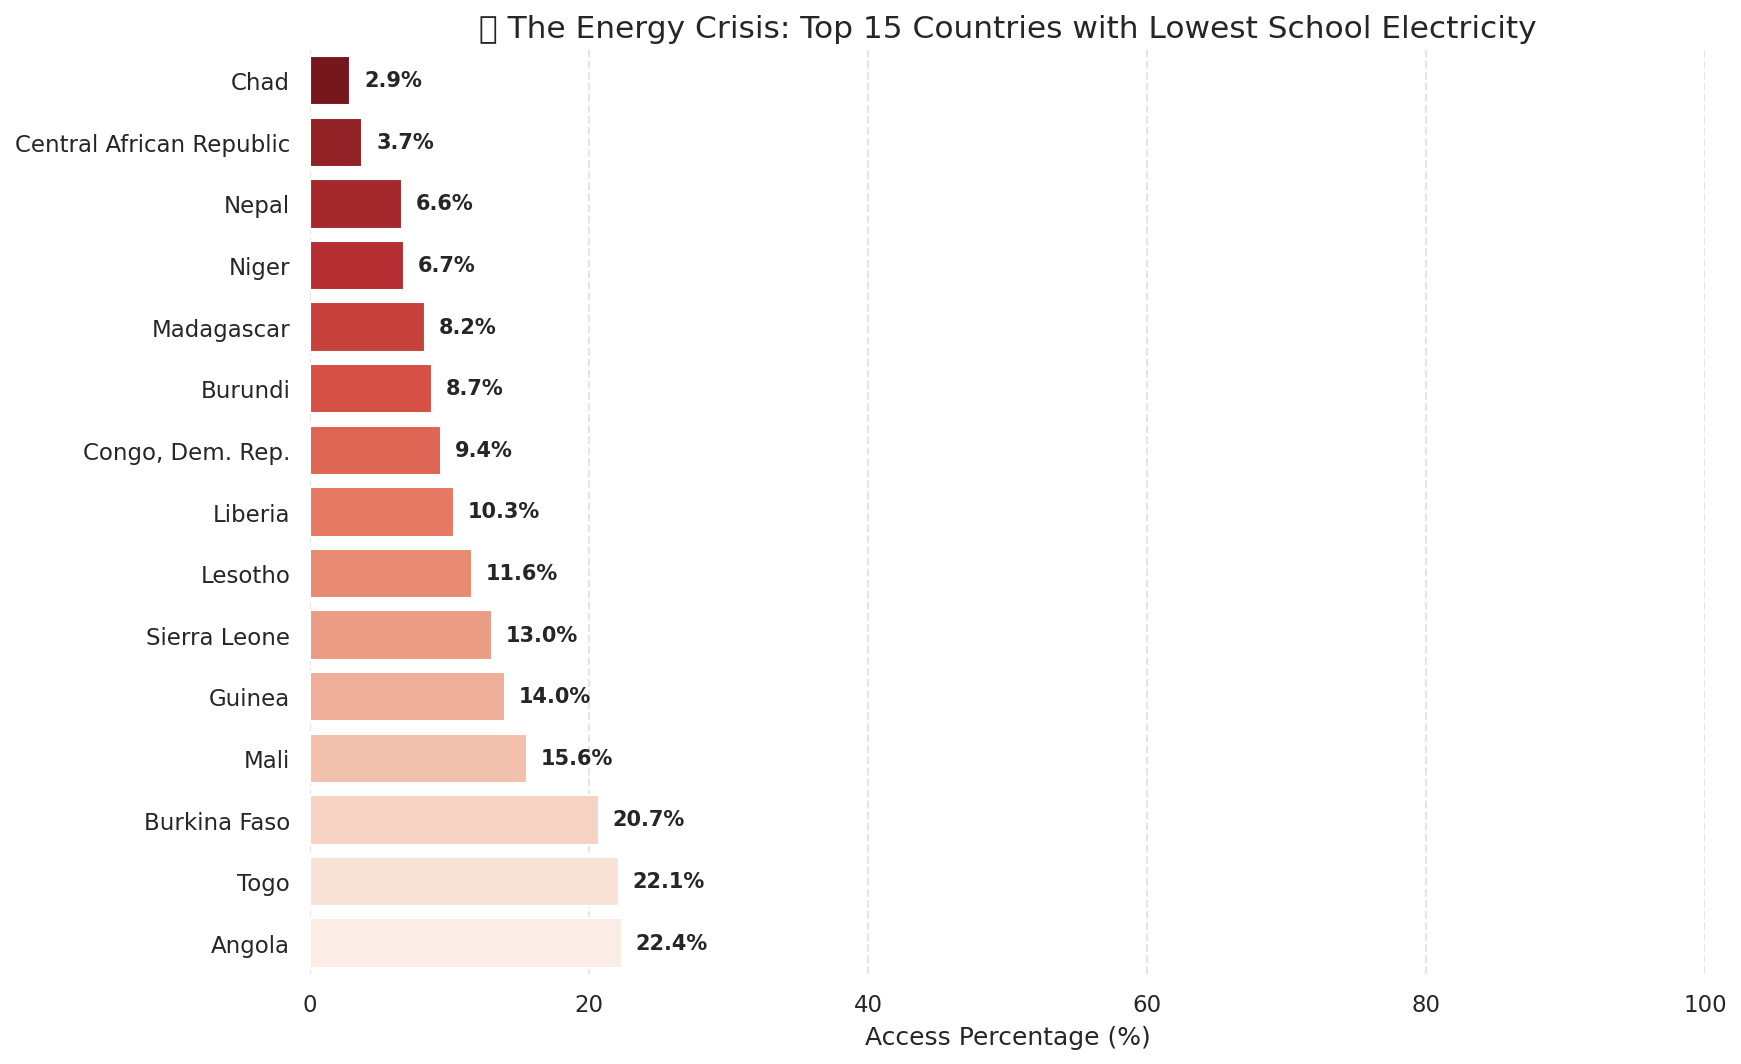

In [12]:
# Filter for countries with Critical Shortage
critical_countries = df_latest[df_latest['Status'] == 'Critical Shortage'].sort_values('Electricity_Access_Percent')

plt.figure(figsize=(12, 8))
sns.barplot(
    data=critical_countries.head(15), 
    y='Country_Name', 
    x='Electricity_Access_Percent', 
    palette='Reds_r'
)

# Add value labels
for index, value in enumerate(critical_countries['Electricity_Access_Percent'].head(15)):
    plt.text(value + 1, index, f'{value:.1f}%', va='center', fontsize=10, weight='bold')

plt.title('🚨 The Energy Crisis: Top 15 Countries with Lowest School Electricity', fontsize=15)
plt.xlabel('Access Percentage (%)')
plt.ylabel('')
plt.xlim(0, 100)
sns.despine(left=True, bottom=True)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

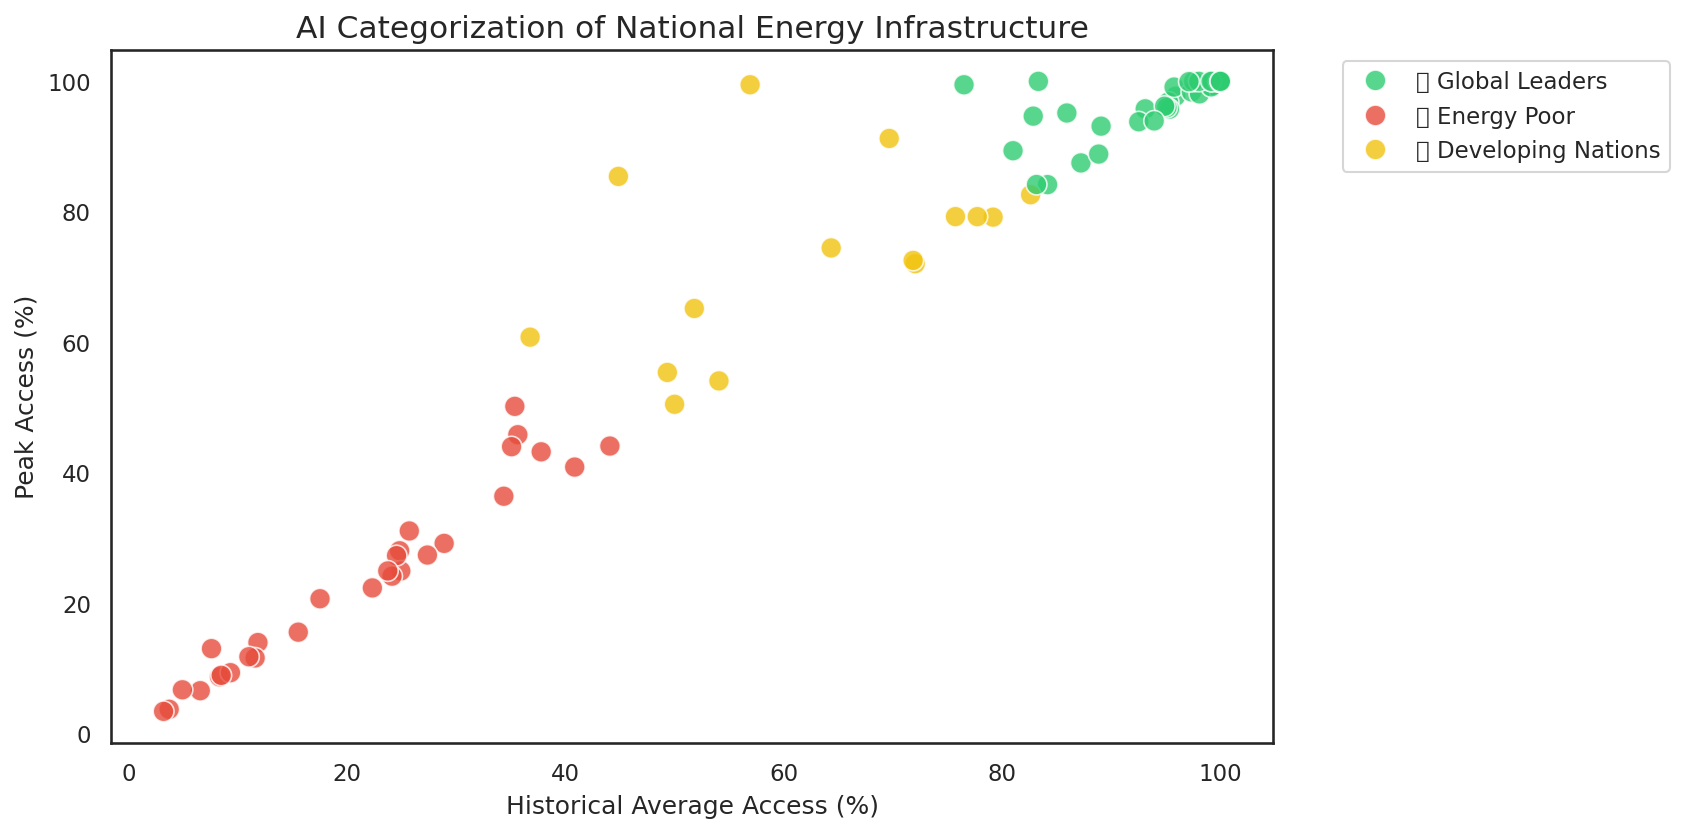

In [13]:
# Feature Engineering
country_stats = df.groupby('Country_Name')['Electricity_Access_Percent'].agg(['mean', 'std', 'max']).fillna(0)
country_stats.columns = ['Avg_Access', 'Volatility', 'Max_Access']

# K-Means Clustering
X = country_stats[['Avg_Access', 'Max_Access']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
country_stats['Cluster'] = kmeans.fit_predict(X_scaled)

# Map Cluster IDs to meaningful names
cluster_centers = kmeans.cluster_centers_[:, 0]
sorted_idx = np.argsort(cluster_centers)
cluster_map = {sorted_idx[2]: '🟢 Global Leaders', sorted_idx[1]: '🟡 Developing Nations', sorted_idx[0]: '🔴 Energy Poor'}
country_stats['Cluster_Label'] = country_stats['Cluster'].map(cluster_map)

# Visualizing the Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=country_stats, 
    x='Avg_Access', 
    y='Max_Access', 
    hue='Cluster_Label', 
    palette={'🟢 Global Leaders': '#2ecc71', '🟡 Developing Nations': '#f1c40f', '🔴 Energy Poor': '#e74c3c'},
    s=100, alpha=0.8
)
plt.title('AI Categorization of National Energy Infrastructure', fontsize=15)
plt.xlabel('Historical Average Access (%)')
plt.ylabel('Peak Access (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<div style="background: linear-gradient(to right, #11998e, #38ef7d); padding: 30px; border-radius: 15px; box-shadow: 0 4px 8px 0 rgba(0,0,0,0.2);">
    <h1 style="color: white; font-family: 'Verdana'; text-align: center; text-shadow: 2px 2px 4px #000000;">Conclusion & Insight Box</h1>
</div>

<div style="background-color: #f8f9fa;color:black; border-left: 6px solid #2ecc71; padding: 20px; box-shadow: 2px 2px 5px rgba(0,0,0,0.1);">
    <h3 style="color: #27ae60;">🌱 Key Strategic Findings</h3>
    <p>Our analysis reveals a divided world:</p>
    <ul>
        <li><b>The Digital Divide is Real:</b> While <b>Europe and NA</b> sit comfortably at 100%, many nations in <b>Sub-Saharan Africa</b> (like Niger and Chad) still operate with < 20% school electricity.</li>
        <li><b>The "Developing" Cluster:</b> Our K-Means model identified a distinct group of "Developing Nations" (Yellow Cluster) that have shown rapid growth from 2010-2020. These are the prime candidates for renewable energy investment.</li>
        <li><b>Data Gap:</b> The volatility in the "Energy Poor" cluster suggests inconsistent data reporting, which is a key area for improvement in future surveys.</li>
    </ul>
</div>

<div style="background: linear-gradient(to right, #11998e, #38ef7d); padding: 30px; border-radius: 15px; box-shadow: 0 4px 8px 0 rgba(0,0,0,0.2);">
    <h1 style="color: white; font-family: 'Verdana'; text-align: center; text-shadow: 2px 2px 4px #000000;">Thanks</h1>
</div>